In [14]:
import numpy as np
import json
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from skimage.draw import disk

def create_mask_from_json(json_data, shape):
    mask = np.zeros(shape, dtype=np.float32)
    for item in json_data:
        rr, cc = disk((item['y'], item['x']), item['radius'], shape=shape)
        mask[rr, cc] = 1.0
    return mask

def load_images_and_labels(image_dir, label_dir):
    image_files = [file for file in sorted(os.listdir(image_dir)) if file.endswith('.png')]
    label_files = [file for file in sorted(os.listdir(label_dir)) if file.endswith('.json')]
    
    images = []
    masks = []
    filenames = []  # Store filenames

    for image_file, label_file in zip(image_files, label_files):
        # Load image
        img_path = os.path.join(image_dir, image_file)
        image = img_to_array(load_img(img_path, color_mode='rgb'))
        images.append(image / 255.0)  # Normalizing

        # Load corresponding label
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as file:
            json_data = json.load(file)
        mask = create_mask_from_json(json_data, shape=(1024, 1024))
        masks.append(mask)

        # Store filename without extension
        filenames.append(os.path.splitext(image_file)[0])

    return np.array(images), np.array(masks).reshape(-1, 1024, 1024, 1), filenames

def save_masks(images, masks, filenames, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for filename, mask in zip(filenames, masks):
        mask = (mask * 255.0).astype(np.uint8)
        mask_image = Image.fromarray(mask.squeeze())
        mask_image.save(os.path.join(save_dir, f'{filename}.png'))

# Usage
image_dir = './TMA_WSI_Padded_PNGs'
label_dir = './TMA_WSI_Labels_updated'
save_dir = './image_labels'

images, masks, filenames = load_images_and_labels(image_dir, label_dir)
save_masks(images, masks, filenames, save_dir)


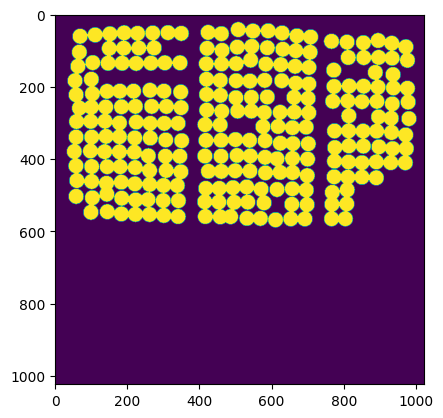

In [15]:
plt.imshow(masks[0])